<a href="https://colab.research.google.com/github/tiagopessoalima/covid-19/blob/master/COVID_19_(Gr%C3%A1ficos).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTANDO BIBLIOTECAS**

In [0]:
import numpy as np
import pandas as pd

**FUNÇÕES AUXILIARES**

In [0]:
def novos_casos(dataset):
  dataset = dataset.copy()
  for linha in range(len(dataset.values)):
    for coluna in range(dataset.values[linha].size - 1, 4, -1):                
        dataset._set_value(linha, coluna, dataset.values[linha][coluna] 
                           - dataset.values[linha][coluna-1], True)
  return dataset

In [0]:
def plotar_novos_acumulado(dataset):
  df = pd.concat([somar_datas(novos_casos(dataset)), 
                  somar_datas(dataset)], axis=1)  
  df.columns = (['novos casos', 'acumulado'])
  df.plot()

In [0]:
def somar_datas(dataset):
  dataset = dataset.copy()
  dataset = np.sum(dataset.iloc[:,4:])
  dataset.index = pd.DatetimeIndex(dataset.index)
  return dataset

**CARREGANDO DADOS**

In [0]:
confirmados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
recuperados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')
mortes = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')

In [0]:
pais = 'Brazil'
confirmados = confirmados[confirmados['Country/Region'] == pais]
recuperados = recuperados[recuperados['Country/Region'] == pais]
mortes = mortes[mortes['Country/Region'] == pais]

**CASOS CONFIRMADOS**

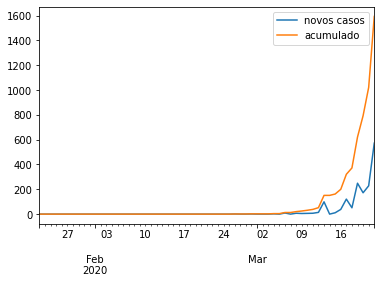

In [0]:
plotar_novos_acumulado(confirmados)

**CASOS RECUPERADOS**

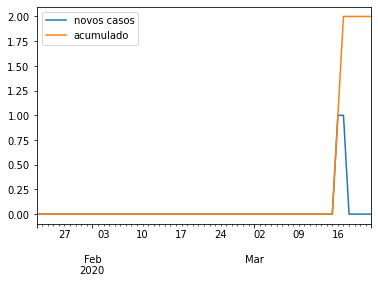

In [0]:
plotar_novos_acumulado(recuperados)

**MORTES CONFIRMADAS**

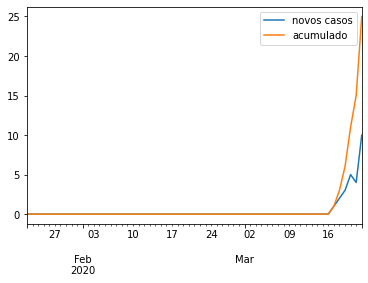

In [0]:
plotar_novos_acumulado(mortes)

**TRANSMISSORES**

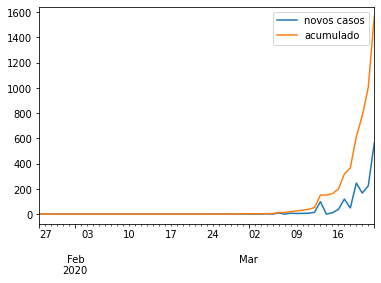

In [0]:
transmissores = confirmados.iloc[:,4:] - recuperados.iloc[:,4:] - mortes.iloc[:,4:]
plotar_novos_acumulado(transmissores)

**ACUMULADO**

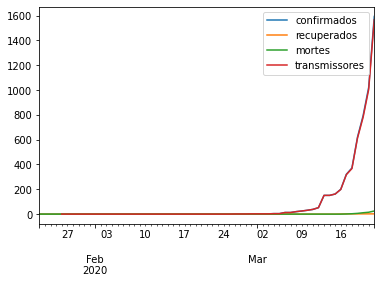

In [0]:
df = pd.concat([somar_datas(confirmados), somar_datas(recuperados), 
                somar_datas(mortes), somar_datas(transmissores)], axis=1)  
df.columns = (['confirmados', 'recuperados', 'mortes', 'transmissores'])
df.plot()

**NOVOS CASOS**

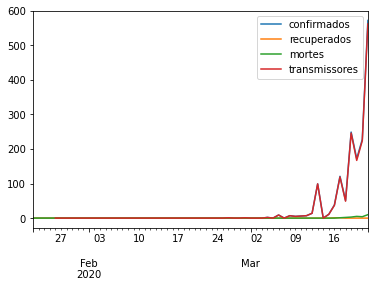

In [0]:
df = pd.concat([somar_datas(novos_casos(confirmados)), 
                somar_datas(novos_casos(recuperados)), 
                somar_datas(novos_casos(mortes)), 
                somar_datas(novos_casos(transmissores))], axis=1)  
df.columns = (['confirmados', 'recuperados', 'mortes', 'transmissores'])
df.plot()

##**PREVISÕES**

In [0]:
from fbprophet import Prophet
dias = 7

**MORTES**

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


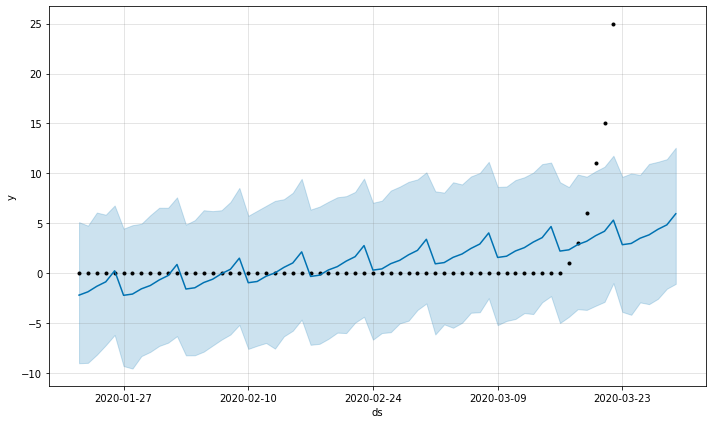

In [0]:
df = pd.DataFrame(somar_datas(mortes))
df.reset_index(inplace=True)
df.columns = ['ds','y']

profeta = Prophet(interval_width=0.95)
profeta.fit(df)
futuro = profeta.make_future_dataframe(dias)
previsao = profeta.predict(futuro)
previsao[['ds', 'yhat_lower', 'yhat', 'yhat_upper']]
forecast = profeta.plot(previsao)